# House price predict

#### import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset=pd.read_csv('data.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(4600, 18)


In [4]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df2 = dataset.drop(['date'],axis='columns')
df2.shape

(4600, 17)

In [7]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### information about the data

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

#### checking null values


In [10]:
df2.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<AxesSubplot:>

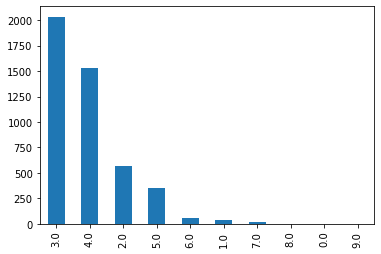

In [9]:
df2['bedrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

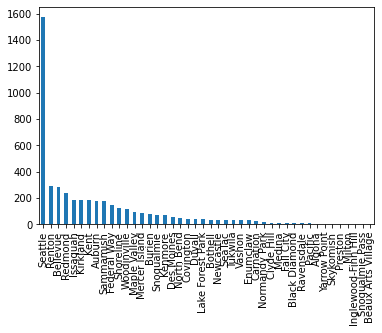

In [10]:
df2['city'].value_counts().plot(kind='bar')

# Spliting the data set into X and Y

In [12]:
x = df2.loc[:,["bedrooms","bathrooms","sqft_living",'sqft_lot','floors','waterfront','view','condition','sqft_above','yr_built','yr_renovated']]

In [13]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1974,0


In [14]:
y=df2.loc[:,['price']]


In [17]:
y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


## split x and y into testing and training

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## model building

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.548845807913277

## Export the tested model to a pickle file

In [31]:
import pickle

In [32]:
file = open('model.pkl', 'wb')

In [33]:
pickle.dump(model, file)